   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 co

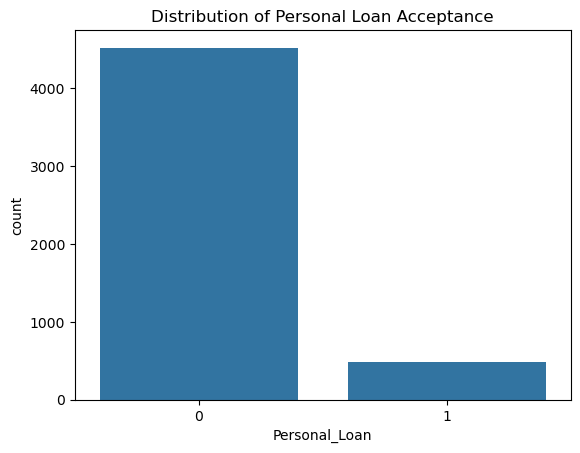

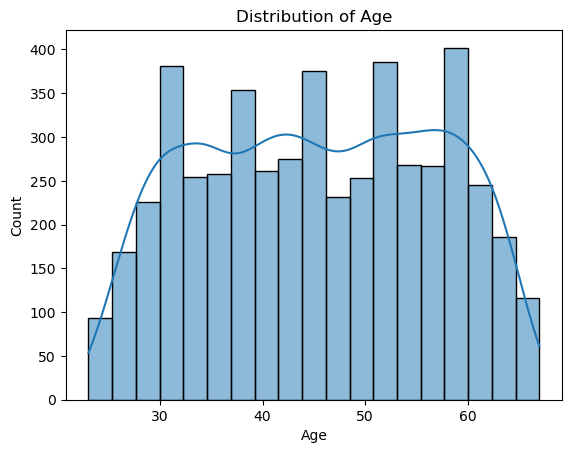

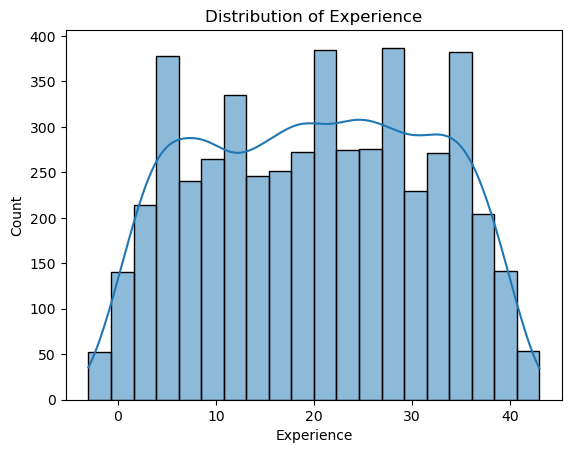

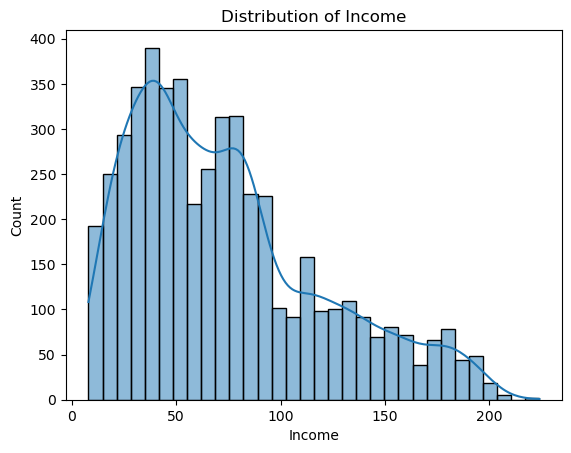

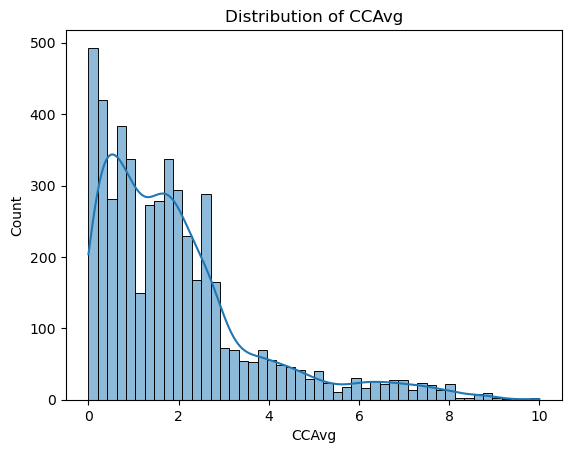

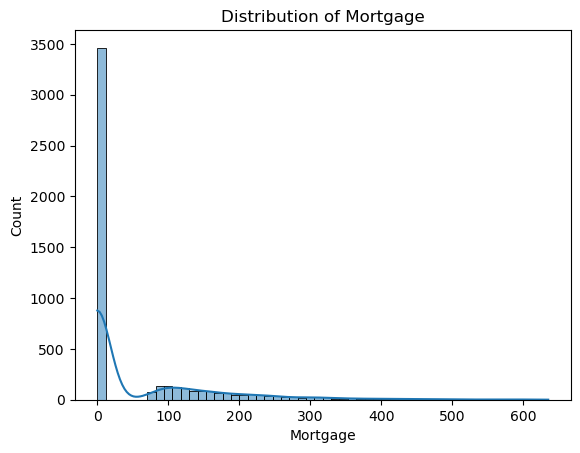

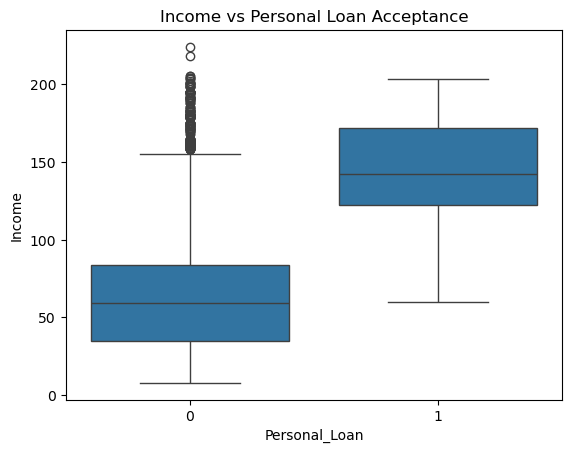

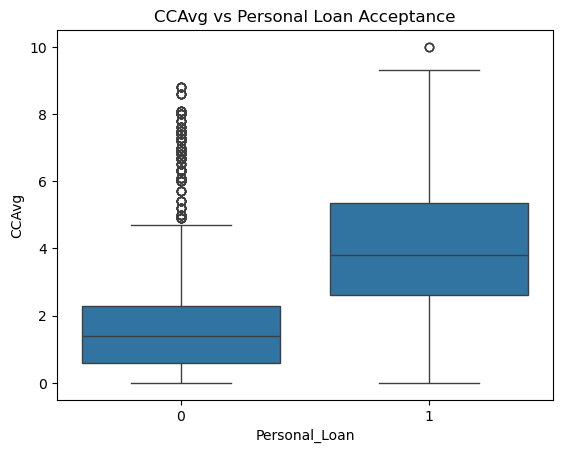

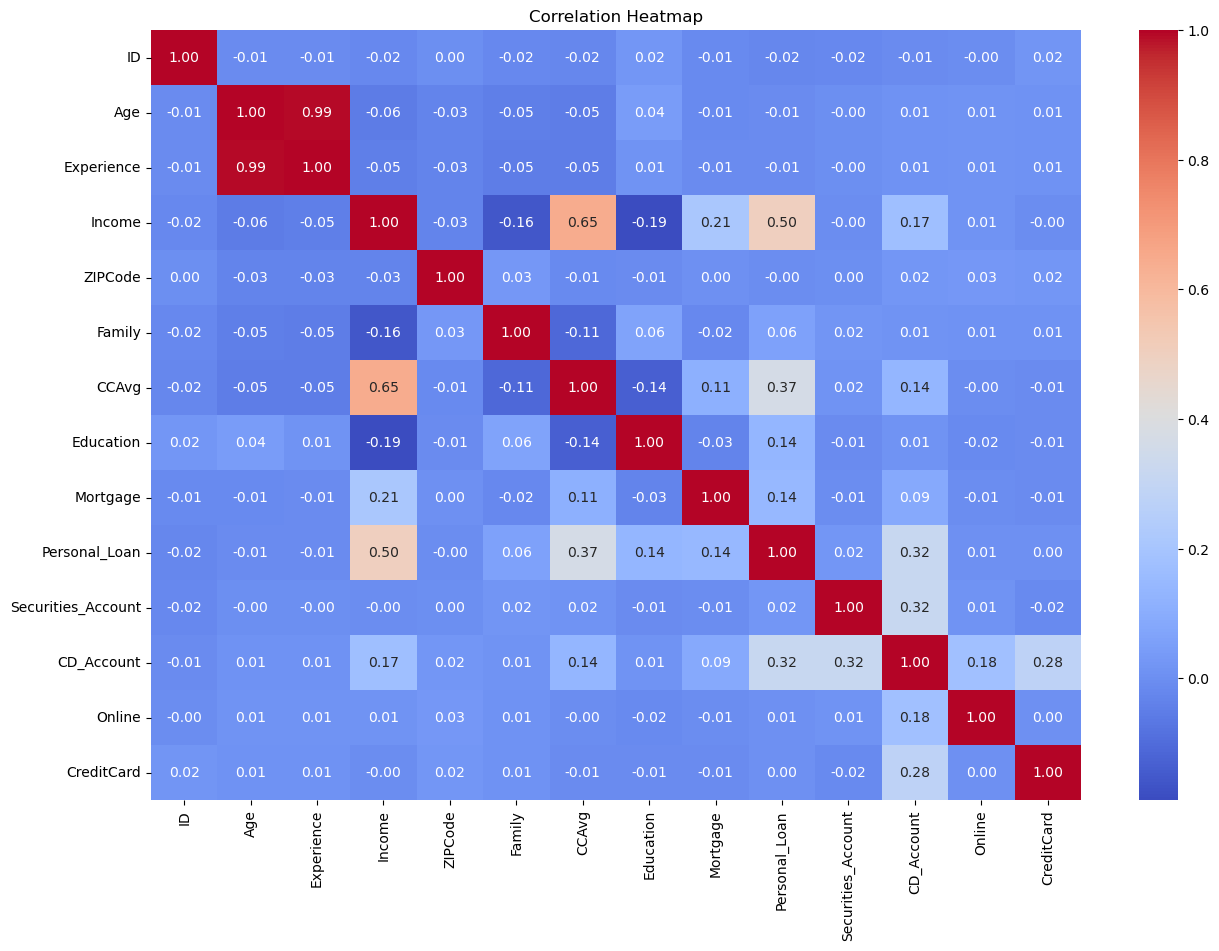

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


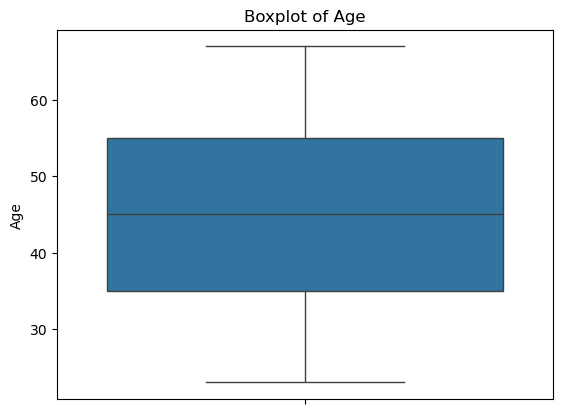

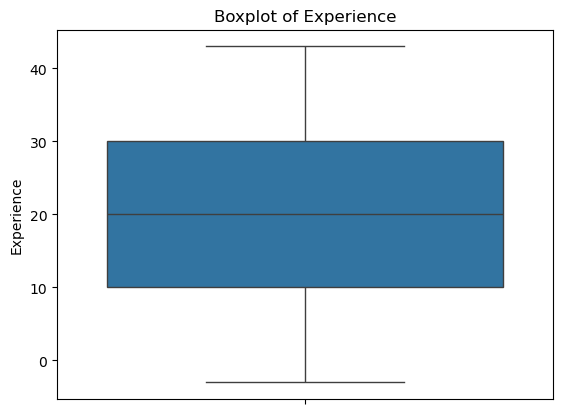

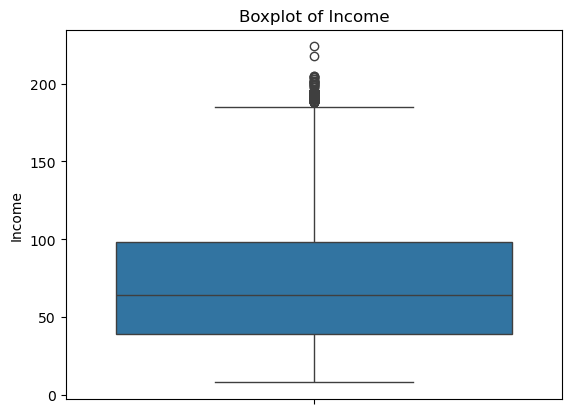

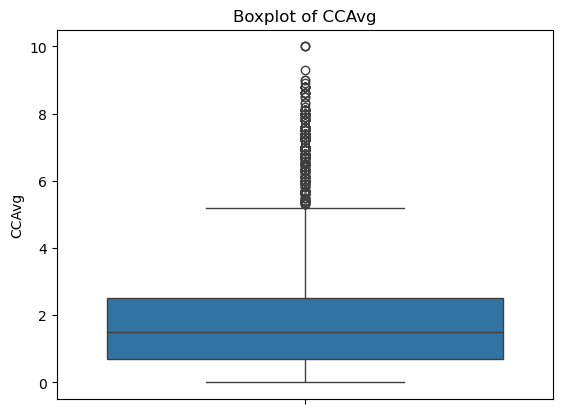

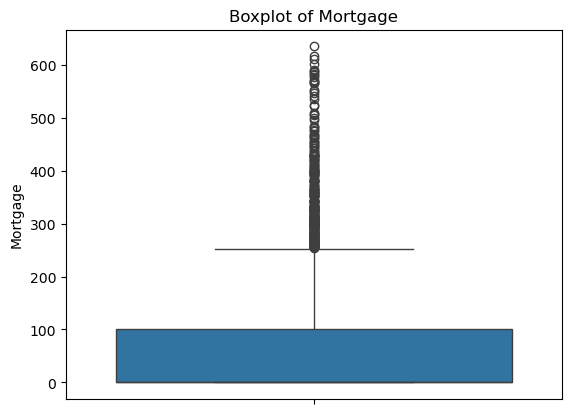

Confusion Matrix:
 [[1331   12]
 [  14  143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.91      0.92       157

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500


Accuracy Score: 0.9826666666666667


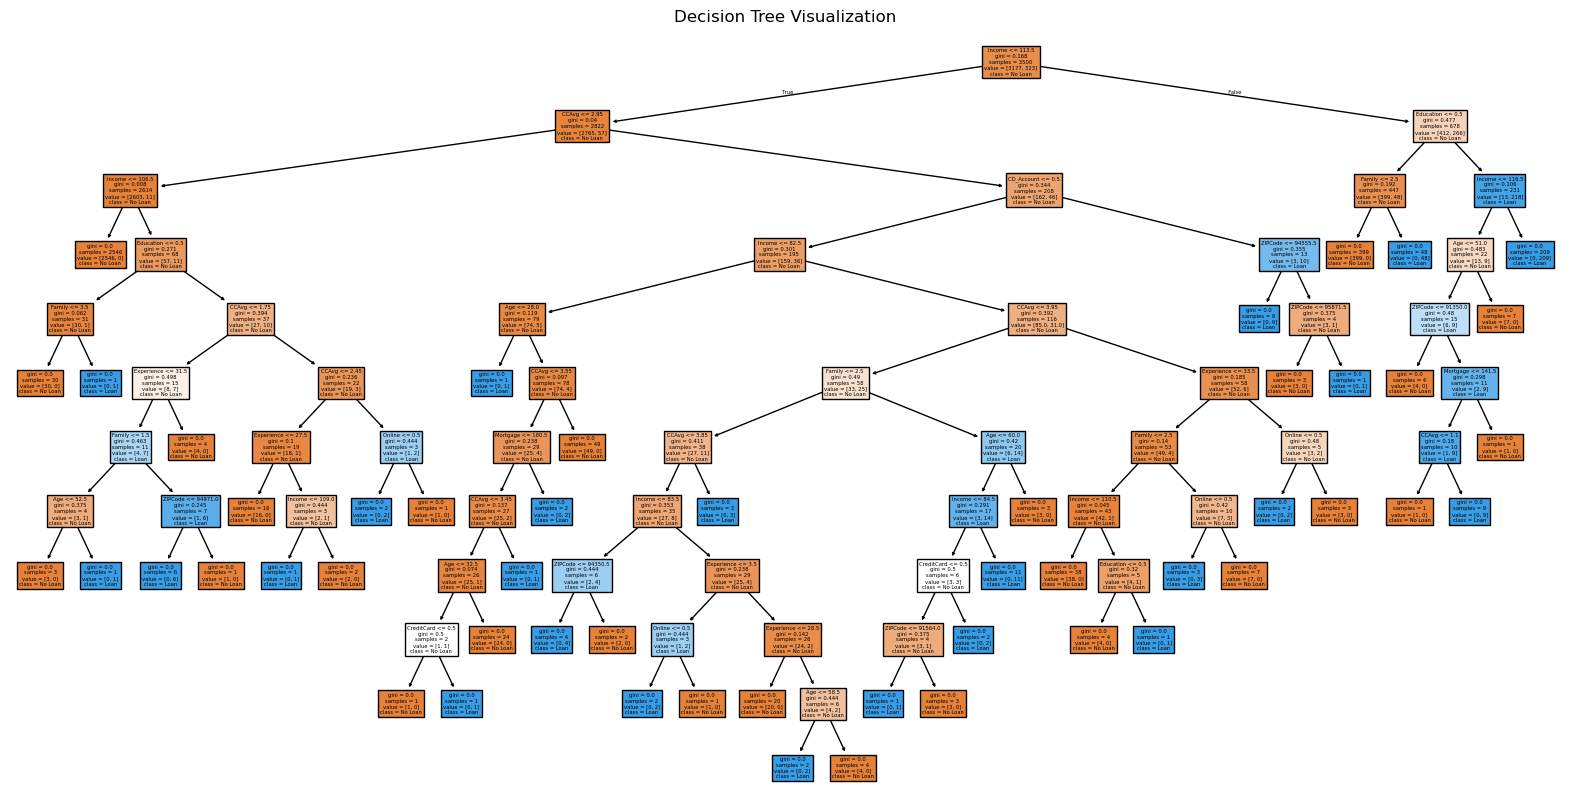


Pruned Model Accuracy: 0.9826666666666667


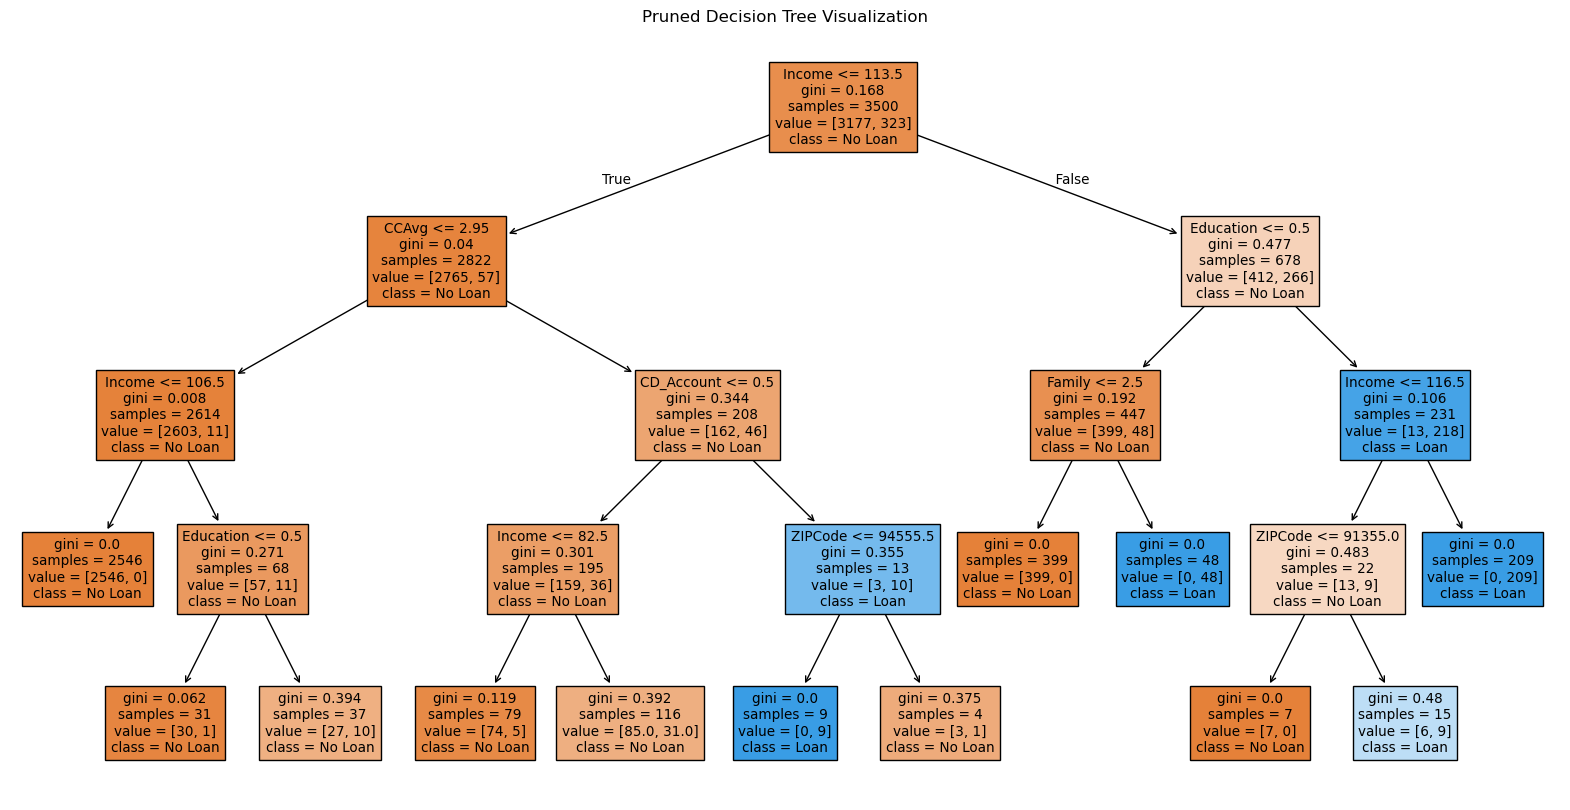

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data = pd.read_csv("C:\\Users\\harsh\\Downloads\\Loan_Modelling.csv")

# Problem Definition:
# The goal is to predict whether liability customers (depositors) of AllLife Bank will purchase personal loans.
# The objective is to identify significant customer attributes driving loan purchases and determine target segments for marketing campaigns.

# Data Exploration  and Background:

print(data.head())
print(data.info())
print(data.describe())

# Univariate Analysis:
# Analyze the distribution of the target variable `Personal_Loan`
sns.countplot(x='Personal_Loan', data=data)
plt.title('Distribution of Personal Loan Acceptance')
plt.show()


numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Bivariate Analysis:
# Analyze relationships between features and the target variable `Personal_Loan`
sns.boxplot(x='Personal_Loan', y='Income', data=data)
plt.title('Income vs Personal Loan Acceptance')
plt.show()

sns.boxplot(x='Personal_Loan', y='CCAvg', data=data)
plt.title('CCAvg vs Personal Loan Acceptance')
plt.show()

# Correlation heatmap 
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))  # Increase figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Observations:
# - Higher income levels correlate positively with personal loan acceptance.
# - CCAvg and Mortgage show positive relationships with loan acceptance.
# - Features like Age and Experience have weaker correlations with the target variable.

# Data Preprocessing:

print(data.isnull().sum())

# Outlier Detection using boxplots for numerical features
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


for feature in ['Income', 'CCAvg']:
    upper_limit = data[feature].quantile(0.95)
    lower_limit = data[feature].quantile(0.05)
    data[feature] = np.clip(data[feature], lower_limit, upper_limit)

# Feature Engineering:

data['Education'] = data['Education'].astype('category').cat.codes

# Model Building: Decision Tree Classifier
X = data.drop(['Personal_Loan', 'ID'], axis=1)  # Features excluding target and ID column
y = data['Personal_Loan']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluating model performance on test set
y_pred = dt_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualizing decision rules using plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Loan', 'Loan'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Model Performance Improvement: Pruning the Decision Tree
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)  # Pre-pruning by limiting depth
dt_pruned.fit(X_train, y_train)

y_pred_pruned = dt_pruned.predict(X_test)
print("\nPruned Model Accuracy:", accuracy_score(y_test, y_pred_pruned))

plt.figure(figsize=(20,10))
plot_tree(dt_pruned, feature_names=X.columns, class_names=['No Loan', 'Loan'], filled=True)
plt.title("Pruned Decision Tree Visualization")
plt.show()






In [ ]:
#Insights & Recommendations:
#Conclusion
# 1. High-Income and High-Spending Customers: Customers with higher incomes and credit card spending (CCAvg) are more likely to accept personal loans.
# 2.Mortgage Holders and Digital Users: Mortgage holders and online banking users show a higher likelihood of loan acceptance.

#Business Recommendations
# 1. Target High-Income Segments: Focus marketing campaigns on customers earning above the median income level and tailor personalized loan offers.

# 2. Leverage Digital Channels: Promote online banking services and use digital platforms for targeted campaigns to increase engagement and conversions.